In [1]:
import os

os.chdir("/DeepenData/Repos/Flux_v0")
import warnings

warnings.filterwarnings("ignore")
import time
from data.mocks import planificacion_simulador

import releases.simv7 as sim
dataset = sim.DatasetTTP.desde_csv_atenciones(
    "data/fonasa_monjitas.csv.gz"
)  # IdOficina=2)
un_dia = dataset.un_dia("2023-05-15").sort_values(by="FH_Emi", inplace=False)
skills = sim.obtener_skills(un_dia)
#########################
# ---Ver tiempos de espera históricos---
#########################
#un_dia.T_Esp.hist()

len(registros_atenciones) = 659, len(fila) = 0
tiempo total: 3.5 segundos


<function matplotlib.pyplot.show(close=None, block=None)>

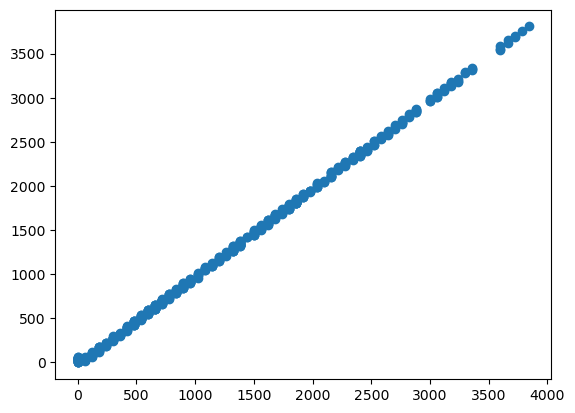

In [2]:
start_time = time.time()
hora_cierre = "15:00:00"
# planificacion = sim.plan_desde_skills(skills, inicio="08:00:00", porcentaje_actividad=1)
registros_atenciones, fila = sim.simv7(
    un_dia, hora_cierre, planificacion_simulador)#, log_path="dev/simulacion.log")
print(f"{len(registros_atenciones) = }, {len(fila) = }")
end_time = time.time()
print(f"tiempo total: {end_time - start_time:.1f} segundos")
import pandas as pd
import matplotlib.pyplot as plt
muestra_seq = (
    registros_atenciones.head(500)
    .drop("Priority", axis=1, inplace=False)
    .sort_values("FH_AteIni")
    .reset_index(drop=True, inplace=False)
)
first_times = pd.to_datetime(muestra_seq.FH_Emi).dt.time
second_times = pd.to_datetime(muestra_seq.FH_AteIni, format="%H:%M:%S").dt.time
muestra_seq["diff"] = [
    abs(
        pd.to_datetime(f"2000-01-01 {s}") - pd.to_datetime(f"2000-01-01 {f}")
    ).total_seconds()
    for f, s in zip(first_times, second_times)
]
plt.scatter(muestra_seq["espera"], muestra_seq["diff"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

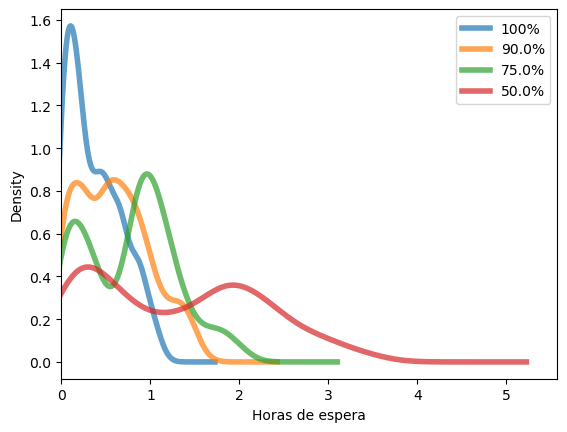

In [3]:
#########################
# ---Ver tiempos de espera vs. % de actividad---
#########################
import matplotlib.pyplot as plt
import copy

planificacion_ = copy.deepcopy(planificacion_simulador)


for porcentaje in [1, 0.9, 0.75, 0.5]:
    for k in planificacion_.keys():
        # Solo hay un bloque horario, por eso el [0]
        planificacion_[k][0]["propiedades"]["porcentaje_actividad"] = porcentaje

    registros_atenciones, _ = sim.simv7(un_dia, hora_cierre, planificacion_, probabilidad_pausas = 0.5, factor_pausas = .06)

    (registros_atenciones.espera / 60 / 60).plot(
        kind="density", alpha=0.7, label=f"{porcentaje*100}%", linewidth=4
    )
plt.legend()
plt.xlim(0, None)
plt.xlabel("Horas de espera")
plt.show

In [5]:
from datetime import date, time, datetime
import numpy as np
tiempo_total = (
        datetime.strptime(hora_cierre, "%H:%M:%S")
        - datetime.strptime(str(un_dia.FH_Emi.min().time()), "%H:%M:%S")
    ).total_seconds() / 60


tuple(np.array((lambda x: 
    (int(x / 10), int(x)/2, int(1 * x)))(
                                        ((1-0.8
                                        )*1.1*tiempo_total))).astype(int))

(8, 41, 83)